# Airline Passenger Satisfaction
This dataset contains an airline passenger satisfaction survey. The goal is predict if the client was satisfayed  or not.

Age: The actual age of the passengers

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Ease of Online booking: Satisfaction level of online booking

Seat comfort: Satisfaction level of Seat comfort

Check-in service: Satisfaction level of Check-in service

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [2]:
import pandas as pd
from funpymodeling.exploratory import freq_tbl, status
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
import pickle

/home/aylen/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/aylen/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/aylen/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not ava

Cargamos los datos train y test y los concatenamos

In [3]:
data_train = pd.read_csv("/home/aylen/Desktop/DataScience_Bootcamp/semana7/train.csv", sep=',', index_col=0)
data_test = pd.read_csv("/home/aylen/Desktop/DataScience_Bootcamp/semana7/test.csv", sep=',', index_col=0)
all_data = pd.concat([data_train, data_test], axis=0)

Nos quedamos solo con las columnas de interes

In [4]:
data = all_data[['Age', 'Class', 'Inflight wifi service', 'Ease of Online booking', 'Seat comfort', 'Checkin service', 'satisfaction']].copy()

Eliminamos los espacios en blanco en el nombre de las columnas para evitar conflictos

In [5]:
data.rename(
    columns = {
        'Inflight wifi service':'Wifi',
        'Ease of Online booking':'Booking',
        'Seat comfort':'Seat',
        'Checkin service':'Checkin',
        }, 
inplace = True)

In [45]:
data.describe()

,Age,Wifi,Booking,Seat,Checkin,satisfaction
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,2.728696,2.756876,3.441361,3.306267,0.434463
std,15.119360,1.329340,1.401740,1.319289,1.266185,0.495688
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,2.000000,2.000000,2.000000,3.000000,0.000000
50%,40.000000,3.000000,3.000000,4.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,5.000000,4.000000,1.000000
max,85.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [6]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Age,0,0.0,0,0.000000,75,int64
1,Class,0,0.0,0,0.000000,3,object
2,Wifi,0,0.0,3916,0.030151,6,int64
3,Booking,0,0.0,5682,0.043748,6,int64
4,Seat,0,0.0,1,0.000008,6,int64
5,Checkin,0,0.0,1,0.000008,6,int64
6,satisfaction,0,0.0,0,0.000000,2,object


In [7]:
data.head(5)

,Age,Class,Wifi,Booking,Seat,Checkin,satisfaction
0,13,Eco Plus,3,3,5,4,neutral or dissatisfied
1,25,Business,3,3,1,1,neutral or dissatisfied
2,26,Business,2,2,5,4,satisfied
3,25,Business,2,5,2,1,neutral or dissatisfied
4,61,Business,3,3,5,3,satisfied


In [8]:
class_map = {'neutral or dissatisfied':0, 'satisfied':1}
data['satisfaction'] = data['satisfaction'].map(class_map)

In [9]:
data_ohe=pd.get_dummies(data,dtype=int)

In [28]:
data_ohe.rename(columns={"Class_Eco Plus":"Class_Eco_Plus"},inplace = True)

In [29]:
data_ohe.head(5)

,Age,Wifi,Booking,Seat,Checkin,satisfaction,Class_Business,Class_Eco,Class_Eco_Plus
0,13,3,3,5,4,0,0,0,1
1,25,3,3,1,1,0,1,0,0
2,26,2,2,5,4,1,1,0,0
3,25,2,5,2,1,0,1,0,0
4,61,3,3,5,3,1,1,0,0


Tomamos una muestra de los datos para alivianar el modelo

In [30]:
data_sample = data_ohe.sample(frac=0.4)

## Modelo de Clasificacion

Separamos las variables predictoras de la variable a predecir

In [31]:
x_data=data_sample.drop('satisfaction',axis=1)
y_data=data_sample['satisfaction']

Creacion de los datasets de training y testing

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

Creacion del modelo predictivo rf

In [33]:
# Creamos 5000 decision trees
rf = RandomForestClassifier(n_estimators = 5000, random_state = 19)

In [34]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5000, random_state=19)

In [35]:
# En training
pred_tr=rf.predict(x_train)

# En testing
pred_ts=rf.predict(x_test)

In [36]:
from sklearn.metrics import accuracy_score

Training

In [37]:
df_val_tr=pd.DataFrame({'y_train':y_train, 'pred_tr':pred_tr})

In [17]:
accuracy_score(df_val_tr.y_train, df_val_tr.pred_tr, normalize=True)

0.9367438074706322

In [38]:
#Accuracy del modelo con sample data
accuracy_score(df_val_tr.y_train, df_val_tr.pred_tr, normalize=True)

0.953693009954353

Testing

In [39]:
df_val_ts=pd.DataFrame({'y_test':y_test, 'pred_ts':pred_ts})

In [19]:
accuracy_score(df_val_ts.y_test, df_val_ts.pred_ts, normalize=True)

0.8832255415255107

In [40]:
#Accuracy del modelo con sample data
accuracy_score(df_val_ts.y_test, df_val_ts.pred_ts, normalize=True)

0.875401000898242

Matriz de confusion

In [20]:
# atención, asume 0.5 como punto de corte
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

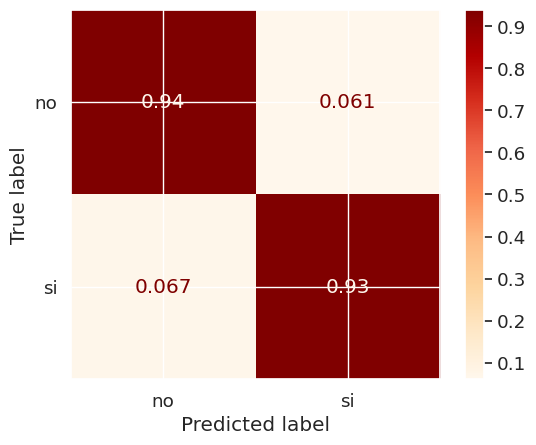

In [22]:
sns.set(font_scale=1.2) #  Ajuste tamaño de letra (var global)

ConfusionMatrixDisplay.from_estimator(
    rf, x_train, y_train,
    display_labels=['no','si'],
    cmap='OrRd',
    normalize='true',
    )

Curva ROC

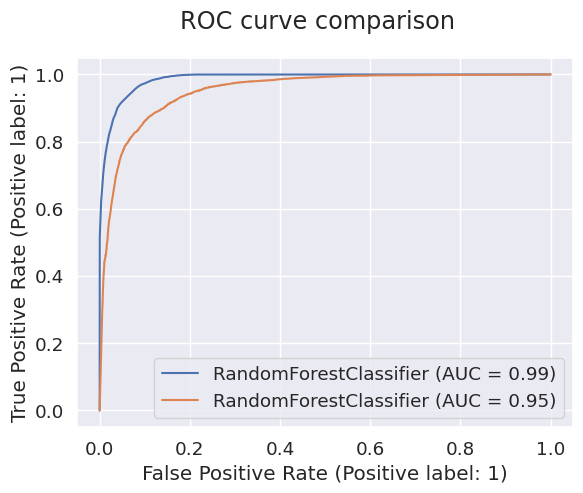

In [23]:
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

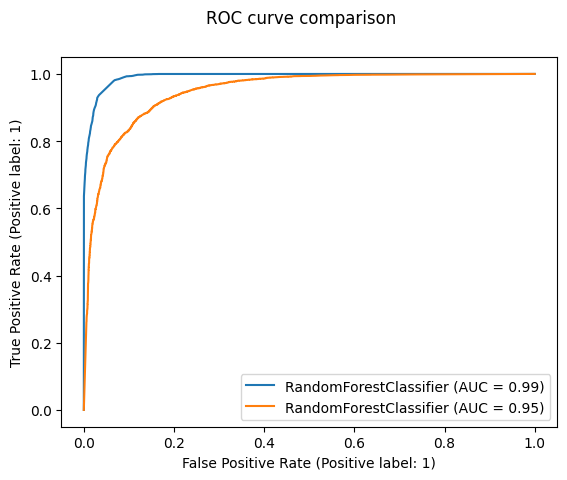

In [41]:
#Curva ROC del modelo con sample data
from sklearn.metrics import RocCurveDisplay

tr_disp = RocCurveDisplay.from_estimator(rf, x_train, y_train)
ts_disp = RocCurveDisplay.from_estimator(rf, x_test, y_test, ax=tr_disp.ax_)
ts_disp.figure_.suptitle("ROC curve comparison")

plt.show()

In [42]:
# Lo guardamos al disco
filename = '/home/aylen/Desktop/DataScience_Bootcamp/Bootcamp-DataScience/passenger_satisfaction/model/rf_sample_airline.pkl'
pickle.dump(rf, open(filename, 'wb')) # rf = nuestro modelo

In [43]:
with open('/home/aylen/Desktop/DataScience_Bootcamp/Bootcamp-DataScience/passenger_satisfaction/model/categories_ohe_airline.pkl', 'wb') as handle:
        pickle.dump(x_data.columns, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [44]:
x_data.columns

Index(['Age', 'Wifi', 'Booking', 'Seat', 'Checkin', 'Class_Business',
       'Class_Eco', 'Class_Eco_Plus'],
      dtype='object')